# **Base Code:- Autism Disease Detection using Deep Learning**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!unzip "/content/drive/MyDrive/Rajatgupta/Autism/archive.zip"

Streaming output truncated to the last 5000 lines.
  inflating: AutismDataset/consolidated/Autistic/0881.jpg  
  inflating: AutismDataset/consolidated/Autistic/0882.jpg  
  inflating: AutismDataset/consolidated/Autistic/0883.jpg  
  inflating: AutismDataset/consolidated/Autistic/0884.jpg  
  inflating: AutismDataset/consolidated/Autistic/0885.jpg  
  inflating: AutismDataset/consolidated/Autistic/0886.jpg  
  inflating: AutismDataset/consolidated/Autistic/0887.jpg  
  inflating: AutismDataset/consolidated/Autistic/0888.jpg  
  inflating: AutismDataset/consolidated/Autistic/0889.jpg  
  inflating: AutismDataset/consolidated/Autistic/0890.jpg  
  inflating: AutismDataset/consolidated/Autistic/0891.jpg  
  inflating: AutismDataset/consolidated/Autistic/0892.jpg  
  inflating: AutismDataset/consolidated/Autistic/0893.jpg  
  inflating: AutismDataset/consolidated/Autistic/0894.jpg  
  inflating: AutismDataset/consolidated/Autistic/0895.jpg  
  inflating: AutismDataset/consolidated/Autistic/

In [ ]:
from sklearn.model_selection import train_test_split

from sklearn.metrics import accuracy_score
##########################################
%matplotlib inline
from skimage import io
from skimage.io import imread, imshow
import glob
import numpy as np

import pandas as pd
'''*Using Python's flatten() method, we are able to reduce the dimension of a matrix to just one. order: In row-major notation,
 the letter 'C' denotes to flatten. The letter 'F' indicates a flattening in column-major notation. If an is Fortran continuous in memory,
 the 'A' directive will cause the array to be flattened using column-major order; otherwise, it will use row-major order. The letter 'K' implies to flatten an array in the order that the items appear in memory. The letter 'C' is the default.'''
#Pandas is the most extensively used Python data analysis package. It provides highly optimised performance using back-end source code.
import glob

import cv2
#Opencv is a free open-source computer vision framework that can be used for video, CCTV, and picture analysis.
import os

import random
import matplotlib.pyplot as plt

from tqdm import tqdm

from keras.layers import Dense, Flatten, AveragePooling2D, Dropout
'''The word "dropout" refers to a strategy that removes certain network nodes. Dropping out entails momentarily deactivating or ignoring
the network's neurons. This approach is used during the training stage to mitigate the impacts of overfitting.'''

from keras.models import Model
from keras.applications.vgg16 import VGG16
from keras.preprocessing import image

import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline
from tensorflow.keras.optimizers import Adam,SGD

In [ ]:
Autism_data1=glob.glob("/content/AutismDataset/consolidated/Autistic/*") # loading data set

In [ ]:
Autism_data2=glob.glob("/content/AutismDataset/consolidated/Non_Autistic/*") # loading data set

In [ ]:
Autism_data=Autism_data1+Autism_data2

In [ ]:
len(Autism_data) # showing length of data set

2940

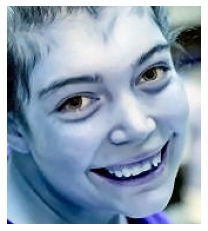

In [ ]:
#showing image
img=cv2.imread(Autism_data[35])
plt.imshow(img)
plt.axis('off')
plt.show()

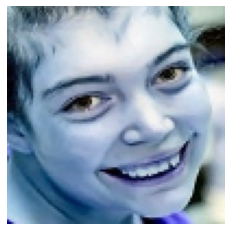

In [ ]:
# resize image 50,50
img_resize=cv2.resize(img,(100,100))
plt.imshow(img_resize,cmap="gray")
plt.axis('off')
plt.show()

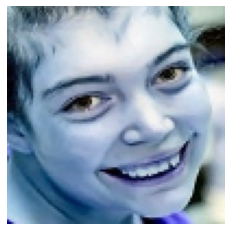

In [ ]:
# change color bgr 2 rgb
image_rgb = cv2.cvtColor(img_resize, cv2.COLOR_BGR2RGB) # change color
plt.imshow(img_resize,cmap="gray") # showing image
plt.axis('off')
plt.show()

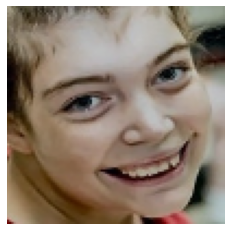

In [ ]:
image_norm = cv2.normalize(image_rgb, None, alpha=0,beta=200, norm_type=cv2.NORM_MINMAX)

plt.imshow(image_norm)
plt.axis('off')
plt.show()


In [ ]:
cls=Autism_data[4].split(os.path.sep)[-2]  # show class name

In [ ]:
cls # show class

'Autistic'

In [ ]:

data=[]
labels=[]
for i in tqdm (range(len(Autism_data))):
    try:
        img= cv2.imread(Autism_data[i]) # read data
        img_resize=cv2.resize(img,(224,224)) # resize image
        image_rgb = cv2.cvtColor(img_resize, cv2.COLOR_BGR2RGB)
        image_norm = cv2.normalize(image_rgb, None, alpha=0,beta=200, norm_type=cv2.NORM_MINMAX)
        data.append(image_norm) # append  image data
        classes=Autism_data[i].split(os.path.sep)[-2]   # classes
        if classes=='Autistic':
            label=0
        elif classes=='Non_Autistic':
            label=1
        labels.append(label)
    except:
        continue

100%|██████████| 2940/2940 [00:07<00:00, 376.17it/s]


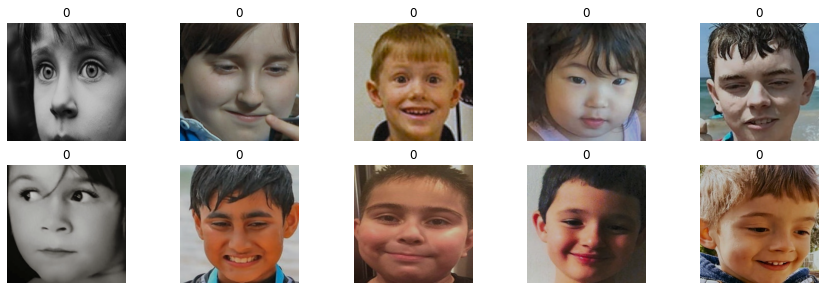

In [ ]:
#showing images
plt.figure(figsize=(15,10))
for i in range(10):
    plt.subplot(4,5,i+1)
    plt.imshow(data[i],cmap ='gray')
    plt.title(labels[i])
    plt.axis("off")

In [ ]:
len(data) # showing length of data

2940

In [ ]:
len(labels) # showing length of labels

2940

In [ ]:
data=np.array(data) # convert data in array
labels=np.array(labels) # convert labels in array

In [ ]:
# showing shape of data and labels
data.shape,labels.shape

((2940, 224, 224, 3), (2940,))

In [ ]:
 # split data train and test
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=1)

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=1)

In [ ]:
# printing  x train and test shape
print(X_train.shape,y_train.shape)
print(X_test.shape,y_test.shape)

(1764, 224, 224, 3) (1764,)
(588, 224, 224, 3) (588,)


In [ ]:
# categorical data
from tensorflow.keras.utils import to_categorical, plot_model
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)
y_val= to_categorical(y_val)

In [ ]:
# printing y train and test shape
print(y_train.shape,y_test.shape,y_val.shape)

(1764, 2) (588, 2) (588, 2)


# **xception**

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential, save_model, load_model
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.layers import Activation, Dropout, Flatten, Dense,BatchNormalization

In [ ]:
base_model = tf.keras.applications.Xception(
    include_top=False,
    weights="imagenet",
    input_shape=(224, 224, 3),
    pooling='avg',
    classes=2,
    classifier_activation="softmax",
)

83697664/83683744 [==============================] - 1s 0us/step


In [ ]:
from tensorflow.keras.callbacks import EarlyStopping #it is used to specify an arbitrary large number of training epochs and stop training once the model performance stops improving on a hold out validation datase

In [ ]:
early_stop = EarlyStopping(mode = "min",verbose = 1, patience = 5)

In [ ]:
num_of_class = 2


model = Sequential()
model.add(base_model)
model.add(Dropout(0.5))
model.add(Dense(num_of_class, activation='softmax'))


model.compile(loss ='binary_crossentropy',
                     optimizer ='Adam',
                   metrics =['accuracy'])

In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 xception (Functional)       (None, 2048)              20861480  
                                                                 
 dropout_2 (Dropout)         (None, 2048)              0         
                                                                 
 dense_2 (Dense)             (None, 2)                 4098      
                                                                 
Total params: 20,865,578
Trainable params: 20,811,050
Non-trainable params: 54,528
_________________________________________________________________


In [ ]:
H = model.fit(
    X_train,
    y_train,
    batch_size=32,
    callbacks = [early_stop],
    epochs=100,
    validation_data=(X_test, y_test)) #Model Training

Epoch 1/100
56/56 [==============================] - 35s 616ms/step - loss: 7.0855e-04 - accuracy: 1.0000 - val_loss: 0.5303 - val_accuracy: 0.8622
Epoch 2/100
56/56 [==============================] - 35s 626ms/step - loss: 3.5094e-04 - accuracy: 1.0000 - val_loss: 0.5400 - val_accuracy: 0.8656
Epoch 3/100
56/56 [==============================] - 35s 626ms/step - loss: 0.0034 - accuracy: 0.9989 - val_loss: 0.7423 - val_accuracy: 0.8435
Epoch 4/100
56/56 [==============================] - 35s 631ms/step - loss: 0.0033 - accuracy: 0.9994 - val_loss: 0.7033 - val_accuracy: 0.8554
Epoch 5/100
56/56 [==============================] - 35s 629ms/step - loss: 0.0031 - accuracy: 0.9994 - val_loss: 0.6778 - val_accuracy: 0.8793
Epoch 6/100
56/56 [==============================] - 35s 631ms/step - loss: 0.0013 - accuracy: 1.0000 - val_loss: 0.6066 - val_accuracy: 0.8827
Epoch 6: early stopping


In [ ]:
# importing classsification report , confusion matrix
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
pred2 = model.predict(X_test)

In [ ]:
print(classification_report(np.argmax(y_test, axis=1), np.argmax(pred2, axis=1)))
print()
print('Accuracy: ', accuracy_score(np.argmax(y_test, axis=1), np.argmax(pred2, axis=1)))

              precision    recall  f1-score   support

           0       0.87      0.89      0.88       289
           1       0.89      0.88      0.88       299

    accuracy                           0.88       588
   macro avg       0.88      0.88      0.88       588
weighted avg       0.88      0.88      0.88       588


Accuracy:  0.8826530612244898


In [ ]:
from sklearn.metrics import precision_score,recall_score,f1_score
print('Precision by RF of testing data is: %.3f' % precision_score(np.argmax(y_test, axis=1), np.argmax(pred2, axis=1),average='micro'))
# checking the precision value
print('Recall by RF of testing data is: %.3f' % recall_score(np.argmax(y_test, axis=1), np.argmax(pred2, axis=1),average='micro'))
# checking the recall value
print('F1 score by RF of testing data is: %.3f' % f1_score(np.argmax(y_test, axis=1), np.argmax(pred2, axis=1),average='micro'))
# checking the f2 score

Precision by RF of testing data is: 0.883
Recall by RF of testing data is: 0.883
F1 score by RF of testing data is: 0.883


In [ ]:
# importing confusion matrix library
from sklearn.metrics import confusion_matrix
#initializing the cm
cm = confusion_matrix(np.argmax(y_test, axis=1), np.argmax(pred2, axis=1))

Text(69.0, 0.5, 'Original Values')

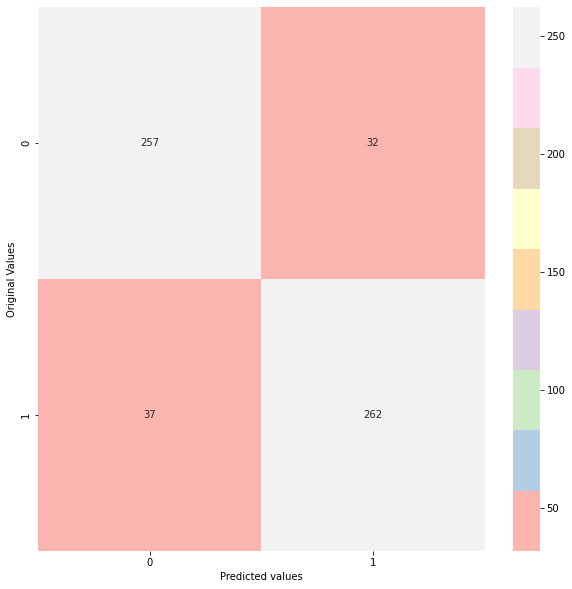

In [ ]:
# plotting confusion matrix
import seaborn as sns
#assigning the size
plt.figure(figsize=(10,10))
# assigning the color
sns.heatmap(cm,annot=True, cmap='Pastel1',  fmt='d')
# assigning the x-axis label
plt.xlabel('Predicted values')
# assigning the y-axis label
plt.ylabel('Original Values')

# **VGG19**

In [ ]:
import keras,os
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense, Activation,GlobalMaxPooling2D
from keras.models import Model
from keras import optimizers , layers, applications
from tensorflow.keras.applications import VGG19 #importing vgg19 model

In [ ]:
#initializing the model
vgg = VGG19(input_shape = (224,224,3),weights = "imagenet", include_top = False)

80150528/80134624 [==============================] - 2s 0us/step


In [ ]:
for layer in vgg.layers:
    layer.trainable = False # making the trainable layer in vgg 19 as false.

In [ ]:
last_layer = vgg.get_layer('block5_pool')
last_output = last_layer.output
# Flatten the output layer to 1 dimension
x = GlobalMaxPooling2D()(last_output)
# Add a fully connected layer with 512 hidden units and ReLU activation
x = Dense(512, activation='relu')(x)
# Add a dropout rate of 0.5
x = Dropout(0.5)(x)
# Add a final sigmoid layer for classification
x = Dense(2, activation='softmax')(x)

In [ ]:
model1 = Model(vgg.input, x)

In [ ]:
early_stop = EarlyStopping(mode = "min",verbose = 1, patience = 5)

In [ ]:
model1.compile(loss='categorical_crossentropy',
             optimizer='Adam',
              metrics=['accuracy'])

In [ ]:
model1.summary() # function to show the summary

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [ ]:
#fitting the model
history = model1.fit(X_train,y_train,
          epochs = 100,
          validation_data = (X_val,y_val),
          callbacks = [early_stop],
          batch_size = 32 )

Epoch 1/100
56/56 [==============================] - 14s 234ms/step - loss: 0.6708 - accuracy: 0.6525 - val_loss: 0.6049 - val_accuracy: 0.7143
Epoch 2/100
56/56 [==============================] - 13s 231ms/step - loss: 0.6171 - accuracy: 0.6927 - val_loss: 0.7194 - val_accuracy: 0.6599
Epoch 3/100
56/56 [==============================] - 13s 232ms/step - loss: 0.5385 - accuracy: 0.7149 - val_loss: 0.5864 - val_accuracy: 0.7398
Epoch 4/100
56/56 [==============================] - 13s 233ms/step - loss: 0.5661 - accuracy: 0.7115 - val_loss: 0.5493 - val_accuracy: 0.7568
Epoch 5/100
56/56 [==============================] - 13s 234ms/step - loss: 0.5322 - accuracy: 0.7126 - val_loss: 0.5338 - val_accuracy: 0.7670
Epoch 6/100
56/56 [==============================] - 13s 237ms/step - loss: 0.5065 - accuracy: 0.7347 - val_loss: 0.5012 - val_accuracy: 0.7653
Epoch 7/100
56/56 [==============================] - 13s 238ms/step - loss: 0.5156 - accuracy: 0.7347 - val_loss: 0.5255 - val_accuracy:

In [ ]:
# importing classsification report , confusion matrix
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
pred2 = model1.predict(X_test)

In [ ]:
print(classification_report(np.argmax(y_test, axis=1), np.argmax(pred2, axis=1)))
print()
print('Accuracy: ', accuracy_score(np.argmax(y_test, axis=1), np.argmax(pred2, axis=1)))

              precision    recall  f1-score   support

           0       0.83      0.65      0.73       289
           1       0.72      0.87      0.79       299

    accuracy                           0.76       588
   macro avg       0.78      0.76      0.76       588
weighted avg       0.77      0.76      0.76       588


Accuracy:  0.7619047619047619


*In the field of machine learning, this term refers to a performance assessment statistic that displays the accuracy, recall, F1 Score, & supporting score of your training classification model.*

In [ ]:
from sklearn.metrics import precision_score,recall_score,f1_score
print('Precision by RF of testing data is: %.3f' % precision_score(np.argmax(y_test, axis=1), np.argmax(pred2, axis=1),average='micro'))
# checking the precision value
print('Recall by RF of testing data is: %.3f' % recall_score(np.argmax(y_test, axis=1), np.argmax(pred2, axis=1),average='micro'))
# checking the recall value
print('F1 score by RF of testing data is: %.3f' % f1_score(np.argmax(y_test, axis=1), np.argmax(pred2, axis=1),average='micro'))
# checking the f2 score

Precision by RF of testing data is: 0.762
Recall by RF of testing data is: 0.762
F1 score by RF of testing data is: 0.762


*A confusion matrix is a table that offers an  overview of  the number of  right and inaccurate predictions given by a classifier. Specifically, it counts the number of each. One is possible to evaluate the effectiveness of a classification model and establish how effectively it carries out its intended purpose by computing performance metrics such as accuracy precision, recall, and F1-score..*

In [ ]:
# importing confusion matrix library
from sklearn.metrics import confusion_matrix
#initializing the cm
cm = confusion_matrix(np.argmax(y_test, axis=1), np.argmax(pred2, axis=1))

Text(69.0, 0.5, 'Original Values')

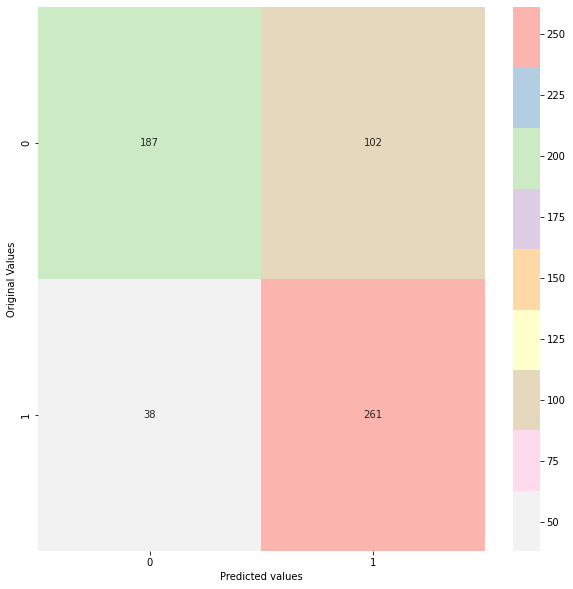

In [ ]:
# plotting confusion matrix
import seaborn as sns
#assigning the size
plt.figure(figsize=(10,10))
# assigning the color
sns.heatmap(cm,annot=True, cmap='Pastel1_r',  fmt='d')
# assigning the x-axis label
plt.xlabel('Predicted values')
# assigning the y-axis label
plt.ylabel('Original Values')